# Deep Learning Practical Assignment 1

## Theoretical Questions

### QUESTION 1

In this section, we are trying to understand the space and time complexity of the Perceptron algorithm.

### Question 1.a

The computational/time complexity is the time that the algorithm needs to run.
In the case of this basic Perceptron algorithm, the first loop which is composed of n iterations, which contains another loop that iterates on the entire dataset composed of m instances.
The complexity is then O(m*n)

### Question 1.b

The space complexity is the memory space needed by an algorithm in order to execute, icluding space taken by the input values.
In the case of the basic Perceptron algorithm, we have the size of an integer as 4 bytes. For our input dataset S we have m instances composed of x which is composed of d values and y, the total is then 4md + 4m. For the weight inout w, it is an integer with d values, we get a total of 4d. For the other two inputs n and t, they are integers so we get 4+4 bytes. Combined we get a total of 4md + 4m + 4d + 4 +4.
Therefore, the total space complexity is O(m*d)

## Package Installation Section

In [20]:
!pip install matplotlib==3.2.2 numpy==1.19.5 scikit-learn==0.22.2.post1

## Implementation section

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import operator

In [47]:
def prepare_dataset(sigma1, sigma2):
    mu1 = [-1,0] 
    mu2 = [1,0]
    x = []
    
    x1 = np.random.normal(mu1, sigma1,size=(125,2))
    x2 = np.random.normal(mu2, sigma2,size=(125,2))
    x = np.concatenate((x1,x2),axis=0)
    
    s=[]
    for i in range(125):
        s.append(np.append(x[i],-1))
    for i in range(125,250):
        s.append(np.append(x[i],1))
        
    return s

In [48]:
def distribution_plot(X,y):
    
    #plotting the distribution
    for i,j in zip(X,y):
        if (j == -1):
            plt.scatter(i[0],i[1],c="red",marker='+')
        else:
            plt.scatter(i[0],i[1],c="blue",marker='o')

In [49]:
def get_X_y(s):
    #extracting X and y parameters with data = (xi,yi) and xi = (x1,x2)
    X = []
    y = []
    for data in s:
        X.append(data[:2])
        y.append(data[2:])
    return (X,y)

In [50]:
def train_test_set(X,y):        
    #we set shuffle parameter to True so it shuffles the dataset before splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    return (X_train, X_test, y_train, y_test)

In [51]:
def perceptron(X,y,n):
    
    w = np.zeros((1,2))
    w_ = np.zeros((1,2))
    
    for i in range(n):
        for xi,yi in zip(X,y) :
            if  yi * np.inner(xi,w) <= 0 : 
                w_ = w
                w = w + yi * xi 
        # Checking if the weight hasn't been updated, if so, return the current value        
        if (w == w_).all() :
            return w
    return w

In [52]:
def decision_boundary (X,y,w):
    
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    
    #plotting the training set
    distribution_plot(X,y)
    
    a = -w[0][0] / w[0][1]
    #i = np.linspace(-1,1)
    i = np.linspace(np.amin(X), np.amax(X))
    #print (np.array(i))
    y = a * i / w[0][1]
    plt.plot(i, y,'k-')

In [53]:
def predict(X, w):
    pred = np.inner(X,w) 
    if pred > 0 :
        return 1
    else:
        return -1

In [54]:
def error(X,y,w):
    error = 0
    for i, Xi in enumerate(X):
        prediction = predict(Xi, w)
        if (prediction != y[i]):
            error += 1
    return error/len(X)

In [55]:
def accuracy(X,y,w):
    return 1-error(X,y,w)

# Experiment 1

In [58]:
#the dataset declaration
s = prepare_dataset(0.25, 0.25)
X, y = get_X_y(s)
#split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_set(X,y)

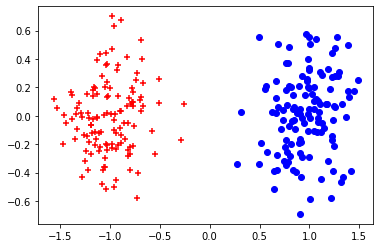

In [59]:
#plotting the distribution
distribution_plot(X,y)

Visibly, we can distinguish the two classes (red and blue). They are linearly separable.
We can conclude that the algorithm converges.

In [60]:
w = perceptron(X,y,10)
print(w)

[[0.81493491 0.23967265]]


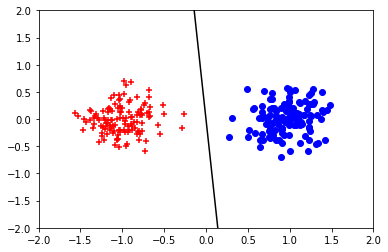

In [61]:
decision_boundary(X,y,w)

For the same initialisation of the weight value, the decision boundary is unique.
However, if we change the initialisation, the decision boundary will differ.

In [62]:
#The accuracy of the classification on the test set
acc = accuracy(X_test, y_test, w)
print("The accuracy of the test set is = "+ str(acc))

The accuracy of the test set is = 1.0


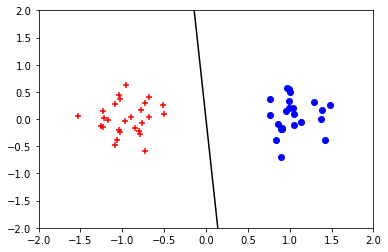

In [63]:
#Plotting the decision boundary on the test set
decision_boundary(X_test,y_test,w)

# Experiment 2

In [64]:
#the dataset declaration
s = prepare_dataset(0.75, 0.75)
X, y = get_X_y(s)

In [65]:
#split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_set(X,y)

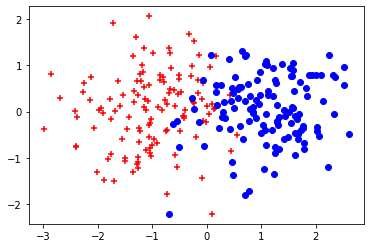

In [66]:
#plotting the distribution
distribution_plot(X,y)

We can clearly see that after changing the variance value of the gaussian distribution from 0.25 to 0.75, the datapoints are no longer linearly separable. Thus, the Perceptron algorithm does not converge.

In [67]:
w = perceptron(X,y,10)
print(w)

[[ 1.78821975 -0.49201984]]


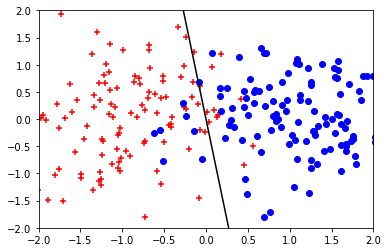

In [68]:
decision_boundary(X,y,w)

For the same initialisation of the weight values, the decision boundary is unique. However, for different initialisation values, the decision boundary is different.

In [69]:
#The accuracy of the classification on the test set
acc = accuracy(X_test, y_test, w)
print("Accuracy = "+ str(acc))

Accuracy = 0.98


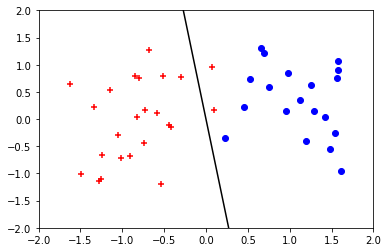

In [70]:
#Plotting the decision boundary on the test set
decision_boundary(X_test,y_test,w)

# Experiment 3

In [73]:
def meanSigmas(sigma):
    
    #we store the errors of multiple experiments
    errors = []
    
    for i in range(30):
        #we generate the dataset
        s = prepare_dataset(sigma, sigma)
        X,y = get_X_y(s)
        
        #we train our model
        X_train, X_test, y_train, y_test = train_test_set(X,y)
        w = perceptron(X_train, y_train, 10)
        
        #we calculate the error on the test set
        error_ = error(X_test, y_test, w)
        errors.append(error_)
        
    #the variance of the stored errors
    var = np.var(errors)
    #the mean of the stored errors
    mean = np.mean(errors)
    
    return var, mean

In [95]:
# the variance values
sigmas=[0.01, 0.1,0.25,0.5,0.7,0.75,1]

#we store the mean and var for each sigma and store them
mean_results = []
var_results = []

for count,sigma in enumerate(sigmas):
    var, mean = meanSigmas(sigma)
    print("for sigma"+str(count)+" = "+ str(sigma)+ " variance = " + str(var)+ " and  the mean = "+str(mean))
    var_results.append(var)
    mean_results.append(mean)

for sigma0 = 0.01 variance = 0.0 and  the mean = 0.0
for sigma1 = 0.1 variance = 0.0 and  the mean = 0.0
for sigma2 = 0.25 variance = 0.0 and  the mean = 0.0
for sigma3 = 0.5 variance = 0.0006706666666666669 and  the mean = 0.034
for sigma4 = 0.7 variance = 0.003112888888888889 and  the mean = 0.09066666666666667
for sigma5 = 0.75 variance = 0.004764888888888888 and  the mean = 0.12466666666666669
for sigma6 = 1 variance = 0.013639555555555554 and  the mean = 0.2206666666666667


Text(0.5, 1.0, 'Error visualisation')

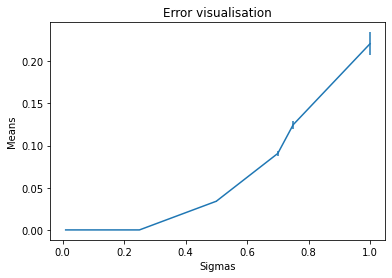

In [98]:
plt.figure()
plt.errorbar(x=sigmas, y=mean_results, yerr=var_results)
plt.xlabel('Sigmas')
plt.ylabel('Means')
plt.title ("Error visualisation")

According to this result, we can notice that by increasing the values of sigma1 and sigma2, the error value also increases.